In [1]:
from typing import TypedDict
class State(TypedDict):
    graph_info: str

In [7]:
def start_play(state: State): 
    print("Start play Node has been called")
    return {"graph_info":state["graph_info"]+"I am planning to play"}

def Cricket(state: State):
    print("Cricket Node has been called")
    return {"graph_info":state["graph_info"]+"Cricket"}

def Badminton(state: State):
    print("Badminton Node has been called")
    return {"graph_info":state["graph_info"]+"Badminton"}

In [11]:
import random
from typing import Literal

def random_play(state: State)-> Literal['Cricket', 'Badminton']:
    if random.random() > 0.5:
        return 'Cricket'
    else:
        return 'Badminton'

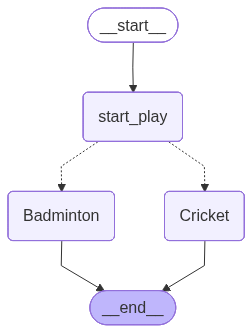

In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build the graph:
graph = StateGraph(State)

# add all the nodes
graph.add_node("start_play", start_play)
graph.add_node("Cricket", Cricket)
graph.add_node("Badminton", Badminton)

#schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge('Cricket', END)
graph.add_edge("Badminton", END)

## Compile 
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
graph_builder.invoke({"graph_info":"My name is Devam"})

Start play Node has been called
Badminton Node has been called


{'graph_info': 'My name is DevamI am planning to playBadminton'}